# Final Project
## Rural Hospital Closures and Economic Viablility

2020 was a record year for the number of rural hospital closures in the United States, topping out at 20. The purpose of this project is to explore the available data related to these closures in an attempt to identify any causal factors, and uncover any economic opportunities rural hospitals might be able to take advantage of to make them more economically viable. 

## Rural Hospital Closures from 2005 to Present

Below is a bar plot that reflects the number of hospital closures since 2005 in the United States ordered by state. Interestingly, there are 13 states who have yet to experience a rural hosptial closure, namely: Delaware, Oregon, Montana, Iowa, Idaho, Conneticut, Rhode Island, Vermont, New Hampshire, Utah, Colorado, Wyoming and Hawaii.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns

# Reading in the data of rural hospital closures
closures = pd.read_excel('Closures-Database-for-Web.xlsx', sheet_name='Sheet1')

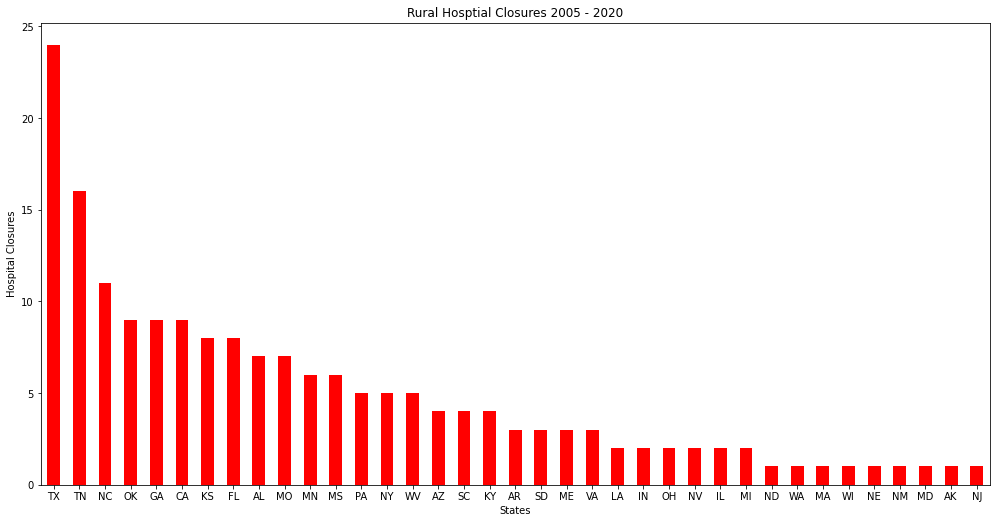

In [2]:
# Grouping closure data by state and plotting 

by_state = closures['State'].value_counts()
by_state.plot.bar(title='Rural Hosptial Closures 2005 - 2020', xlabel = 'States', ylabel='Hospital Closures',color='red', rot=0, figsize=(17, 8.5))

In [3]:
# Reading in full list of US states

states = pd.read_html('https://www.stateabbreviations.us/')
states = states[1]
states = states.drop(states.index[0])

In [4]:
# Creating two lists of states by postal abreviations for purposes of comparing

postal = states['US States, Capitals, and Government Links.2']
close_states = closures['State']

In [5]:
# Comparing our two lists of states to create new list of states not contained in the hospital closures list

no_close = list(set(postal).difference(close_states))
no_close

['MT', 'CO', 'UT', 'OR', 'VT', 'IA', 'HI', 'WY', 'NH', 'CT', 'ID', 'DE', 'RI']

### States Without Closures

Upon identifying the list of states who have not experienced any rural hospital closures in the last 15 years, two primary questions arose. First, of those states with no rural hospital closures, what are their associated rural populations? Second, what is the number of rural designated hospitals in each state with no rural hospital closures?

In [6]:
# Create a dataframe for states with no rural hospital closures based on the previous retrieved list
df_no_close = pd.DataFrame(no_close)
df_no_close['Rural Hospital Closures'] = 'No Closures'
df_no_close.columns = ["Postal Code", 'Rural Hospital Closures']

In [7]:
# Import a postal code crosswalk to get state names
postal_codes = pd.read_html('https://www.infoplease.com/us/postal-information/state-abbreviations-and-state-postal-codes')
postal_codes = postal_codes[0]

In [8]:
# Merging the dataframe of states with no closures with postal code cross walk to add state names
statename_no_close = df_no_close.merge(postal_codes, how ='inner', left_on ='Postal Code', right_on='Postal Code')
statename_no_close = statename_no_close.rename(columns={"State/District": "State"})

In [9]:
# Imporat rural population density data and clean up in preparation for final merge
ruralpop = pd.read_html('https://www.nationalpopularvote.com/rural-states-are-almost-entirely-ignored-under-current-state-state-system')
ruralpop = ruralpop[0]
ruralpop.columns = ruralpop.iloc[0]
ruralpop = ruralpop.drop(ruralpop.index[0])
ruralpop.loc[11,['State']] = ['New Hampshire']

In [10]:
# Merge rural population density data with dataframe of states with no rural hospital closures
rural_index = statename_no_close.merge(ruralpop, how ='inner', left_on ='State', right_on='State')

# Convert percentage column from string to float
rural_index['Rural percent'] = rural_index['Rural percent'].str.rstrip('%').astype('float') / 100.0
rural_index = rural_index.sort_values(by='Rural percent')

rural_index

,Postal Code,Rural Hospital Closures,State,Abbreviation,Total population,Urban-suburban population,Rural population,Rural percent,Index
6,HI,No Closures,Hawaii,Hawaii,1360301,1250489,109812,0.08,42
2,UT,No Closures,Utah,Utah,2763885,2503595,260290,0.09,49
12,RI,No Closures,Rhode Island,R.I.,1052567,955043,97524,0.09,48
9,CT,No Closures,Connecticut,Conn.,3574097,3144942,429155,0.12,62
1,CO,No Closures,Colorado,Colo.,5029196,4332761,696435,0.14,72
11,DE,No Closures,Delaware,Del.,897934,747949,149985,0.17,87
3,OR,No Closures,Oregon,Ore.,3831074,3104382,726692,0.19,98
10,ID,No Closures,Idaho,Idaho,1567582,1106370,461212,0.29,153
7,WY,No Closures,Wyoming,Wyo.,563626,364993,198633,0.35,183
5,IA,No Closures,Iowa,Iowa,3046355,1950256,1096099,0.36,187


### Vermont vs Utah vs Texas

Based on the previous table, it appears that Vermont tops the chart in terms of the percentage of its rural population, with over 60% of the state living in a rural designated area. In healthcare today, volume is very often the differntiating factor between a hospital remaining financially viable or going under. To understand more about the effects of rural populations on the success of rural hospitals I chose to look deeper into three states; Vermont, which has the highest precentage of rural populations among those states with no rural hospital closures, Utah, which has a low percentage of rural populations and no rural hospital closures, and Texas, which has the highest number of rural hospital closures of any other state. Texas has both a higher percentage of its population living in rural area than Utah and has a higher rural population overall than both Vermont and Utah combined. After reviewing the change in the rural population from 2005 to 2010, Utah saw a much greater reduction in its rural population percentage than Texas, although Texas had total rural population number reduction of about 1 million more than both Vermont and Utah combined. This information, although insightful, suggests that rural population density alone cannot fully explain the reason for rural hospital closures.

In [11]:
# Isolating Utah, Vermont and Texas from the rural index dataframe
utah = rural_index[rural_index['Postal Code'] == 'UT']
vermont = rural_index[rural_index['Postal Code'] == 'VT']
texas = ruralpop[ruralpop['State'] == 'Texas']
texas['Rural percent'] = texas['Rural percent'].str.rstrip('%').astype('float') / 100.0
texas['Postal Code'] = 'TX'
texas['Rural Hospital Closures'] = by_state['TX']
texas['Abbreviation'] = 'Tex.'
three_state = [utah, vermont, texas]
ut_vt_tx = pd.concat(three_state)
ut_vt_tx = ut_vt_tx.rename(columns={"Rural population": "Rural Population 2010"})

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [12]:
# Reading in 2005 rural population data
ruralpop05 = pd.read_html('https://www.bts.gov/archive/publications/scheduled_intercity_transportation_and_the_us_rural_population/2010/table_07')
ruralpop05 = ruralpop05[0]
ruralpop05.columns = ['State', 'Total population','Total rural residents', '2005 Rural Number', '2005 Rural Percent', '2010 rural num', '2010 rural per', '3a', '3b','4a', '4b']

In [13]:
# Isolating 2005 rural population data and merging the two dataframes
options = ['Utah', 'Vermont', 'Texas'] 
rslt_df = ruralpop05[ruralpop05['State'].isin(options)]

pd.set_option('display.float_format', '{:.2f}'.format)
rslt_df['2005 Rural Percent'] = rslt_df['2005 Rural Percent'].astype('float') / 100.0
rslt_df['2005 Rural Number'].astype(int)
rslt_df['Rural Population 2005'] = rslt_df['2005 Rural Number'].astype(float) / rslt_df['2005 Rural Percent']
rslt_df['Rural Population 2005'].astype(int)
rslt_df['Rural Population 2005'] = rslt_df['Rural Population 2005'].apply(lambda x: round(x, 0))
newcolumns = ['State', 'Rural Population 2005']
rslt_df = rslt_df[newcolumns]
ut_vt_tx = ut_vt_tx.merge(rslt_df, how ='inner', left_on ='State', right_on='State')

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [14]:
# Adding population variance columns
ut_vt_tx['Rural population Difference'] = ut_vt_tx['Rural Population 2010'].astype(int) - ut_vt_tx['Rural Population 2005']
ut_vt_tx['Rural population Delta'] = ut_vt_tx['Rural population Difference'].astype(int) / ut_vt_tx['Rural Population 2005']
ut_vt_tx

,Postal Code,Rural Hospital Closures,State,Abbreviation,Total population,Urban-suburban population,Rural Population 2010,Rural percent,Index,Rural Population 2005,Rural population Difference,Rural population Delta
0,UT,No Closures,Utah,Utah,2763885,2503595,260290,0.09,49,512074.00,-251784.00,-0.49
1,VT,No Closures,Vermont,Vt.,625741,243385,382356,0.61,317,447925.00,-65569.00,-0.15
2,TX,24,Texas,Tex.,25145561,21298039,3847522,0.15,79,5426199.00,-1578677.00,-0.29


In [15]:
# Modifying ut_vt_tx dataframe for plotting
by_state = ut_vt_tx.loc[:, ut_vt_tx.columns.intersection(['State','Rural Population 2010', 'Rural Population 2005'])]
by_state[['Rural Population 2010', 'Rural Population 2005']] = by_state[['Rural Population 2010', 'Rural Population 2005']].apply(pd.to_numeric)
by_state = by_state.set_index('State')

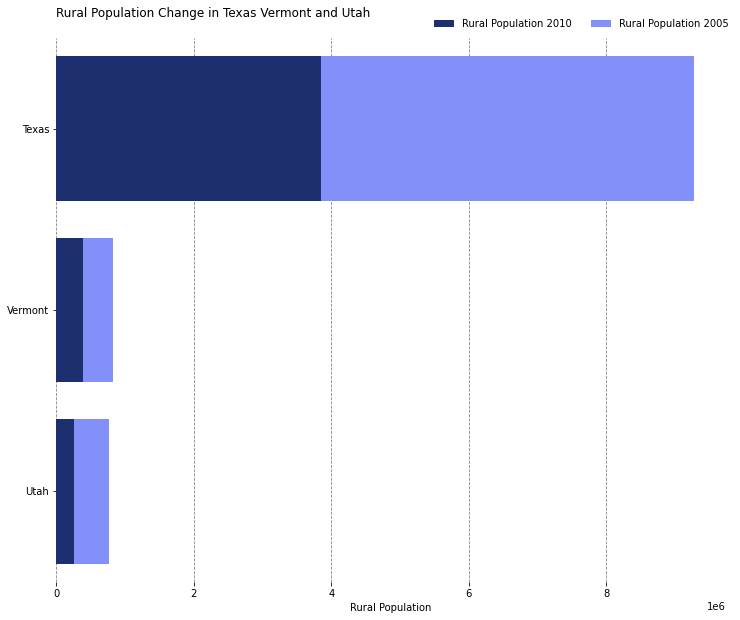

In [16]:
# Create stacked bar graph to review rural population changes overtime, code modified from https://towardsdatascience.com/stacked-bar-charts-with-pythons-matplotlib-f4020e4eb4a7
fields = ['Rural Population 2010','Rural Population 2005']
colors = ['#1D2F6F', '#8390FA']
labels = ['Rural Population 2010', 'Rural Population 2005']# figure and axis
fig, ax = plt.subplots(1, figsize=(12, 10))# plot bars
left = len(by_state) * [0]
for idx, name in enumerate(fields):
    plt.barh(by_state.index, by_state[name], left = left, color=colors[idx])
    left = left + by_state[name]# title, legend, labels
plt.title('Rural Population Change in Texas Vermont and Utah\n', loc='left')
plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
plt.xlabel('Rural Population')# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)# adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()

### Hospital Charge Masters

To get a final glimpse into the dynamics of rural healthcare, and rural hospital closures in these three states, I selected 2 critical access hospitals from each state and explored the charge masters of each. More specifically I searched for emergency department levels charges for comparrison to see if there was anything to be understood.

In [17]:
# Read in all the selected hospital chargemaster files and convert to dataframe
# Compile dataframes into a list
clay_tx = pd.read_csv('Clay County Hospital.csv')
mitchel_tx = pd.read_csv('Mitchel County Hospital TX.csv')
central_ut = pd.read_excel('Central Valley Medical Center UT.xlsx', sheet_name='File to Post')
moab_ut = pd.read_excel('Moab Regional Hospital UT.xlsx', sheet_name='Current Price List')
gifford_vt = pd.read_excel('Gifford Medical Center VT.xlsx', sheet_name='Sheet1', skiprows=5)
porter_vt = pd.read_excel('Porter Hospital VT.xlsx', sheet_name='Standard Charges', skiprows=19)
hospital_sample = [clay_tx, mitchel_tx, central_ut, moab_ut, gifford_vt, porter_vt]

In [18]:
# Add identifying columns to each dataframe to better identify data when combining
clay_tx['Hospital'] = 'Clay County Hospital'
clay_tx['State'] = 'Texas'

mitchel_tx['Hospital'] = 'Mitchel County Hospital'
mitchel_tx['State'] = 'Texas'

central_ut['Hospital'] = 'Central Valley Medical Center'
central_ut['State'] = 'Utah'

moab_ut['Hospital'] = 'Moab Regional Hospital'
moab_ut['State'] = 'Utah'

gifford_vt['Hospital'] = 'Gifford Medical Center'
gifford_vt['State'] = 'Vermont'

porter_vt['Hospital'] = 'Porter Hospital'
porter_vt['State'] = 'Vermont'

In [19]:
# Create function to identify service description column in each dataframe
def service_desc(hospital):
    desc_col = []
    charge_col = []
    for c in hospital.columns:
        if 'description' in c.lower() and 'cpt' not in c.lower():
            desc_col.append(c)
            
        if 'gross' in c.lower():
            charge_col.append(c)
            break
        elif 'price' in c.lower():
            charge_col.append(c)
            break
        elif 'rate' in c.lower() and 'commercial' not in c.lower():
            charge_col.append(c)
            break    

    return desc_col[0]

In [20]:
# Create function to identify gross charge column in each dataframe
def charge_desc(hospital):    
    charge_col = []
    for c in hospital.columns: 
        if 'gross' in c.lower():
            charge_col.append(c)
            break
        elif 'price' in c.lower():
            charge_col.append(c)
            break
        elif 'rate' in c.lower() and 'commercial' not in c.lower():
            charge_col.append(c)
            break
            
    return charge_col[0]

In [21]:
# Create function to convert roman numerals to integers, code modified from https://www.w3resource.com/python-exercises/class-exercises/python-class-exercise-2.php
class py_solution:
    def roman_to_int(self, s):
        rom_val = {'I': 1, 'V': 5, 'X': 10, 'L': 50, 'C': 100, 'D': 500, 'M': 1000}
        int_val = 0
        for i in range(len(s)):
            if i > 0 and rom_val[s[i]] > rom_val[s[i - 1]]:
                int_val += rom_val[s[i]] - 2 * rom_val[s[i - 1]]
            else:
                int_val += rom_val[s[i]]
        return int_val

In [22]:
# Create function to iterate through list of dataframes to extract all ER Level charges then unify and concatenate data into a single dataframe
def ed_charges_df(hospitals):
    
    frames = []
    for hospital in hospitals:
        df = hospital[hospital[service_desc(hospital)].str.contains('(?i)ed level|e d level|er level|e/r level|er class|er service|emergent level', na=False)]
        df1 = df.loc[:, df.columns.intersection([service_desc(hospital),charge_desc(hospital), 'Hospital', 'State'])]
        df1.columns = ['Charge Desc', 'Gross Charge', 'Hospital', 'State']
        
        for line in df1['Charge Desc']:
            if line[-1] == "I":
                roman = line.split()
                roman = list(map(lambda st: str.replace(st, roman[-1], str(py_solution().roman_to_int(roman[-1]))), roman))
#                 line[-1] = py_solution().roman_to_int(line[-1])
                roman = ' '.join(roman)
                df1.loc[df1[df1['Charge Desc']==line].index.values,['Charge Desc']] = roman
            elif line[-1] == "V":
                roman = line.split()
                roman = list(map(lambda st: str.replace(st, roman[-1], str(py_solution().roman_to_int(roman[-1]))), roman))
#                 line[-1] = py_solution().roman_to_int(line[-1])
                roman = ' '.join(roman)
                df1.loc[df1[df1['Charge Desc']==line].index.values,['Charge Desc']] = roman
    
        df1.loc[df1['Charge Desc'].str.contains('(?i)level 1| class 1'), 'Charge Desc'] = 'ER Level 1'
        df1.loc[df1['Charge Desc'].str.contains('(?i)level 2| class 2'), 'Charge Desc'] = 'ER Level 2'
        df1.loc[df1['Charge Desc'].str.contains('(?i)level 3| class 3'), 'Charge Desc'] = 'ER Level 3'
        df1.loc[df1['Charge Desc'].str.contains('(?i)level 4| class 4'), 'Charge Desc'] = 'ER Level 4'
        df1.loc[df1['Charge Desc'].str.contains('(?i)level 5| class 5'), 'Charge Desc'] = 'ER Level 5'
        df1.loc[df1['Charge Desc'].str.contains('(?i)le5el 5'), 'Charge Desc'] = 'ER Level 5'
        df1[["Gross Charge"]] = df1[["Gross Charge"]].apply(pd.to_numeric)
        
        
        frames.append(df1)
        
    result = pd.concat(frames)
    
    return result

In [23]:
ed_levels= ed_charges_df(hospital_sample)
# Clean up stray lines of data imported from ed_level function and sort
ed_levels = ed_levels.drop([1167, 2230, 2231, 2582, 2584, 2586, 2588, 2590])
ed_levels = ed_levels.sort_values(['State','Hospital','Charge Desc'])

In [24]:
# Pivot data in preparation for plotting
by_hospital = pd.pivot_table(ed_levels,
    values='Gross Charge',
    columns='Hospital',
    index='Charge Desc',
    aggfunc='sum')
by_hospital = by_hospital.reindex(['Moab Regional Hospital', 'Central Valley Medical Center', 'Gifford Medical Center', 'Porter Hospital', 'Clay County Hospital', 'Mitchel County Hospital'], axis=1)
by_hospital

Hospital,Moab Regional Hospital,Central Valley Medical Center,Gifford Medical Center,Porter Hospital,Clay County Hospital,Mitchel County Hospital
Charge Desc,,,,,,
ER Level 1,270.00,183.80,273.00,177.00,164.00,156.00
ER Level 2,406.00,262.50,397.00,226.00,327.00,215.00
ER Level 3,735.00,404.30,655.00,378.00,709.00,274.00
ER Level 4,1208.00,650.00,995.00,782.00,1090.00,470.00
ER Level 5,2086.00,1000.00,1439.00,1181.00,1417.00,780.00


Text(0.5, 1.0, 'ER Level Charges Analysis')

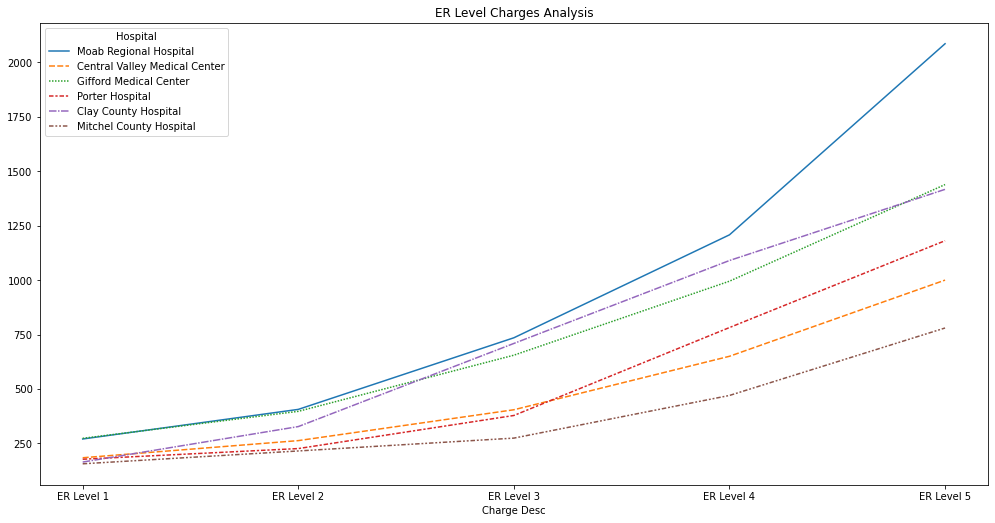

In [25]:
# Plot ER Levels across hospitals
from matplotlib import pyplot
a4_dims = (17, 8.5)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.lineplot(ax=ax,data=by_hospital).set_title('ER Level Charges Analysis')

---

---

---

## Conclusions

Healthcare finance is a complex discipline with multiple factors that impact success, and the success or faliure of rural healthcare providers is equally complex. A much more thorough examination of both successful and failed rural hospitals in conjuction with state population changes and state healthcare reimbursement policies would be needed to make any sure conclusions about why some rural hospitals fail. From this brief analysis it is clear that population changes and charge rates are connected to the success or failure of rural hospitals.

In [26]:
%%bash
git pull
git add final_project.ipynb
git commit -a -m "Submitting Final Project"
git push

Already up to date.
[main fe2791f] Submitting Final Project
 3 files changed, 1391 insertions(+), 141 deletions(-)
 create mode 100644 Final Project/final_project.ipynb


To github.com:joshtaylor1987/hds5210-2021.git
   917a917..fe2791f  main -> main
